In [1]:
import requests

import pandas as pd
import matplotlib.pyplot as plt

# Solve model

In [2]:
r = requests.post("http://127.0.0.1:2021/solve_cellml_model", json={"model": "BR"})

In [3]:
response = r.json()

In [4]:
def solution_to_dataframe(response):
    data = {x["variable"]: x["value"] for x in response["solution"]}
    df = pd.DataFrame(data)
    return df

In [5]:
df = solution_to_dataframe(response)
t = response["time"]
df

,d,f,Cai,x1,m,h,V,j
0,0.003000,0.994000,0.000100,0.000100,0.011000,0.988000,-84.624000,0.975000
1,0.003000,0.994000,0.000100,0.000100,0.011000,0.988000,-84.623500,0.975000
2,0.003000,0.994000,0.000100,0.000100,0.011000,0.988000,-84.557301,0.975000
3,0.003000,0.994001,0.000100,0.000100,0.011042,0.987997,-84.382649,0.975000
4,0.003000,0.994001,0.000100,0.000100,0.011128,0.987993,-84.208086,0.974999
...,...,...,...,...,...,...,...,...
304,0.003072,0.999944,0.000181,0.044496,0.011498,0.986203,-84.220898,0.972979
305,0.003050,0.999953,0.000180,0.035160,0.011377,0.986191,-84.302641,0.973422
306,0.003033,0.999963,0.000180,0.028071,0.011284,0.986897,-84.365883,0.973760
307,0.003020,0.999973,0.000179,0.022684,0.011212,0.987115,-84.414458,0.974017


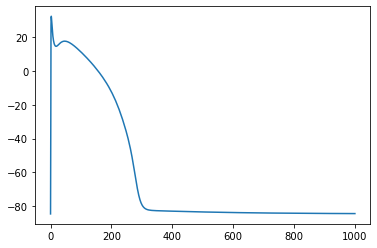

In [6]:
plt.plot(t, df["V"])

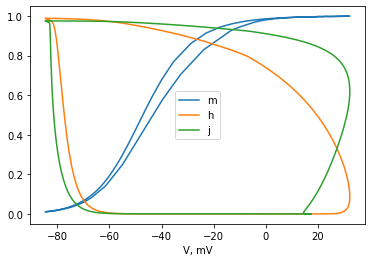

In [7]:
for key in "m", "h", "j":
    plt.plot(df["V"], df[key], label=key)
    
plt.xlabel("V, mV")
plt.legend()

# Get model params

In [8]:
r = requests.post("http://127.0.0.1:2021/get_model_states_params", json={"model": "BR"})

params = pd.DataFrame(r.json()["params"]).set_index(["component", "variable"])["value"]
states = pd.DataFrame(r.json()["states"]).set_index(["component", "variable"])["value"]

In [9]:
params

component            variable          
sodium_current       g_Na                      0.04000
                     E_Na                     50.00000
                     g_Nac                     0.00003
stimulus_protocol    IstimStart               10.00000
                     IstimEnd              50000.00000
                     IstimAmplitude            0.50000
                     IstimPeriod            1000.00000
                     IstimPulseDuration        1.00000
slow_inward_current  g_s                       0.00090
membrane             C                         0.01000
Name: value, dtype: float64

In [10]:
states

component                               variable
slow_inward_current_d_gate              d            0.0030
slow_inward_current_f_gate              f            0.9940
slow_inward_current                     Cai          0.0001
time_dependent_outward_current_x1_gate  x1           0.0001
sodium_current_m_gate                   m            0.0110
sodium_current_h_gate                   h            0.9880
membrane                                V          -84.6240
sodium_current_j_gate                   j            0.9750
Name: value, dtype: float64